<a href="https://colab.research.google.com/github/Mili3101/retail-sales-analysis/blob/development/Visualizaci%C3%B3n_para_ciencia_de_datos_Proyecto_1_%E2%80%93_Parte_V_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de Datos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Ubicamos la ruta de los datos previamente procesados
path = "/content/drive/MyDrive/Data Science - Skillnet/Ejercicios Core/BBDD/retail_sales_processed.csv"
df = pd.read_csv(path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    1000 non-null   int64         
 1   date              1000 non-null   datetime64[ns]
 2   customer_id       1000 non-null   object        
 3   gender            1000 non-null   object        
 4   age               1000 non-null   int64         
 5   product_category  1000 non-null   object        
 6   quantity          1000 non-null   int64         
 7   price_per_unit    1000 non-null   int64         
 8   total_amount      1000 non-null   int64         
 9   clase_ventas      1000 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 78.3+ KB


In [5]:
# Convertir la columna Date a datetime
df['date'] = pd.to_datetime(df['date'])

# Gráficas


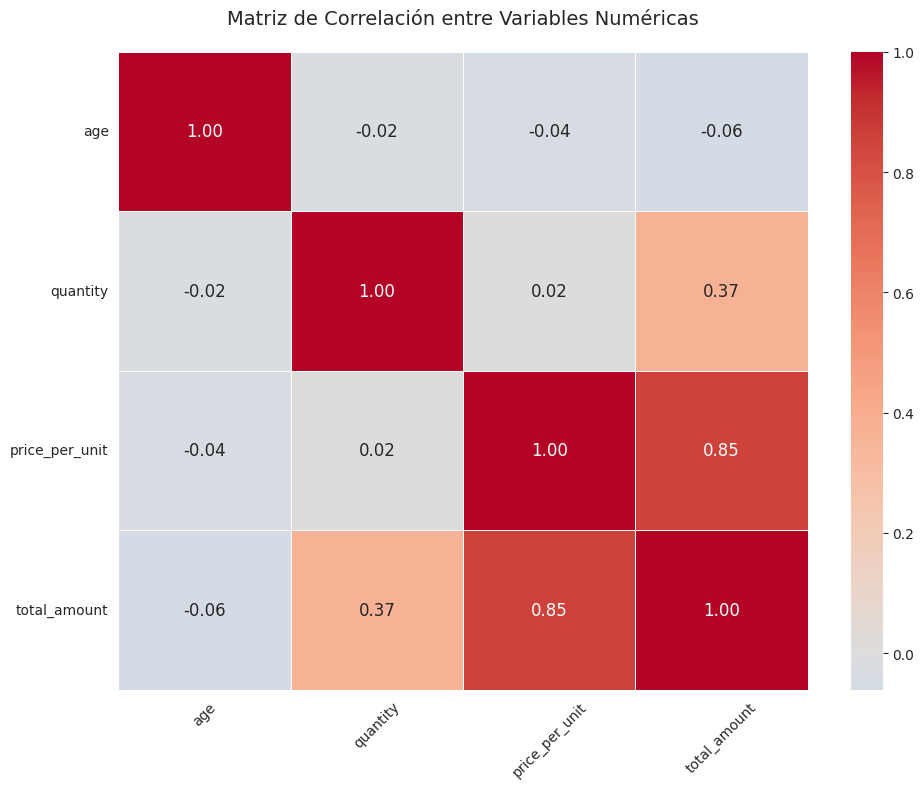

In [15]:
#Mapa de Calor de correlaciones

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar variables numéricas
numeric_cols = ['age', 'quantity', 'price_per_unit', 'total_amount']
corr_matrix = df[numeric_cols].corr()

# Crear mapa de calor con anotaciones
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=.5, annot_kws={'size': 12})
plt.title('Matriz de Correlación entre Variables Numéricas', pad=20, fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

"""Análisis:

La matriz muestra que el monto total (total_amount) se relaciona fuertemente con el precio por unidad (0.85) y moderadamente con la cantidad comprada (0.37),
mientras que la edad no influye significativamente en ninguna variable. Esto indica que las ventas dependen más del tipo de producto que del perfil del cliente.


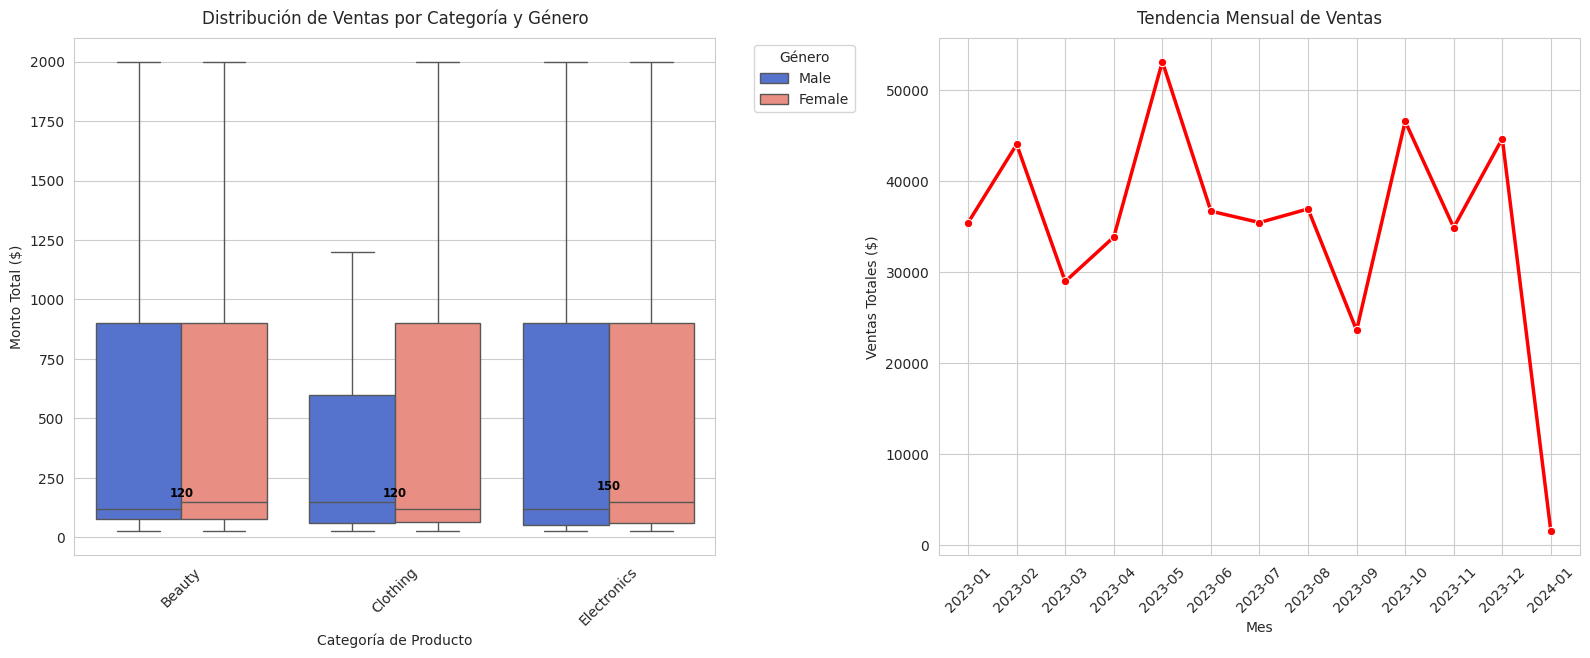

In [28]:
#Subplots con distintas variables para análisis final

# Configuración de estilo
sns.set_style('whitegrid')
plt.figure(figsize=(16, 12))

# Subplot 1: Distribución de ventas por categoría y género
plt.subplot(2, 2, 1)
ax1 = sns.boxplot(x='product_category', y='total_amount', hue='gender', data=df,
                 palette={'Male':'royalblue', 'Female': 'salmon'}, showfliers=False)
plt.title('Distribución de Ventas por Categoría y Género', fontsize=12, pad=10)
plt.xlabel('Categoría de Producto', fontsize=10)
plt.ylabel('Monto Total ($)', fontsize=10)
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Añadir anotaciones con valores medios
for i, category in enumerate(df['product_category'].unique()):
    median_val = df[df['product_category'] == category]['total_amount'].median()
    ax1.text(i, median_val+50, f'{median_val:.0f}',
            horizontalalignment='center', size='small', color='black', weight='semibold')

# Subplot 4: Tendencia temporal de ventas
plt.subplot(2, 2, 2)
df['month'] = df['date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('month')['total_amount'].sum().reset_index()
ax4 = sns.lineplot(x='month', y='total_amount', data=monthly_sales,
                  marker='o', color='red', linewidth=2.5)
plt.title('Tendencia Mensual de Ventas', fontsize=12, pad=10)
plt.xlabel('Mes', fontsize=10)
plt.ylabel('Ventas Totales ($)', fontsize=10)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

"""
Análisis:
En cuanto a la distribución de ventas por categoría y género:
Los datos muestran igualdad en el comportamiento de compra entre géneros en todas las categorías, siendo Electronics la de mayor volumen.
Las ventas presentan montos bajos con algunos valores atípicos altos,
lo que sugiere compras ocasionales de alto valor.

En cuanto a la tendencia mensual de ventas:
La tendencia mensual es inestable, con fuertes subidas y bajadas a lo largo del año.
Enero 2024 destaca por una caída abrupta, posiblemente por estacionalidad o errores de registro.
"""